## Supervised Learning

### CHAPTER 1. Classification
#### 1.1 Supervised learning

**Machine learning** is the art and science of:
* giving computers the ability to learn to make decisions from data
* without being explicitly programmed!

Examples:
* Learning to predict whether an email is spam or not
* Clustering wikipedia entries into different categories

**Unsupervised learning**:
* uncovering hidden patterns from unlabelled data

Examples:
Group customers into distinct categories 

**Reinforcement learning**:
Software agents interact with an environment
* Learn how to optimize their behavior
* Given a system of rewards and punishments
* Draws inspiration from behavioral psychology

Examples:
AlphaGo: first computer to defeat the world champion in Go

**Supervised learning**:
* Predictor variables/ features and a target variable
* Aim: predict the target variable, given the predictor variables
    * Classification: target variable consits of categories
    * Regression: target variable is continuous
    
Supervised learning in Python:

We will use **'scikit-learn/ sklearn'** package.

Other packages may include **'TensorFlow' & 'keras'**.


#### 1.2 Exploratory Data Analysis

Dataset: The Iris dataset

Features:
* Pedal length
* Petal width
* Sepal length
* Sepal width

Target variables:
* Species (Versicolor; Virginica; Setosa)

We can do basic EDA to know better about the dataset and some visual EDA as well.

In [1]:
## install packages
! pip install sklearn
! pip install pandas
! pip install numpy
! pip install matplotlib

In [2]:
# get dataset 'iris'
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
# get dataset keys (data are feature variables, target is target variable)  
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# know data/features and target better
print(type(iris.data), type(iris.target))
print(iris.data.shape) # feature shape
print(iris.target.shape) # target shape
print(iris.feature_names) # feature names
print(iris.target_names)# target names/categories

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
# assign features and target to X and y
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


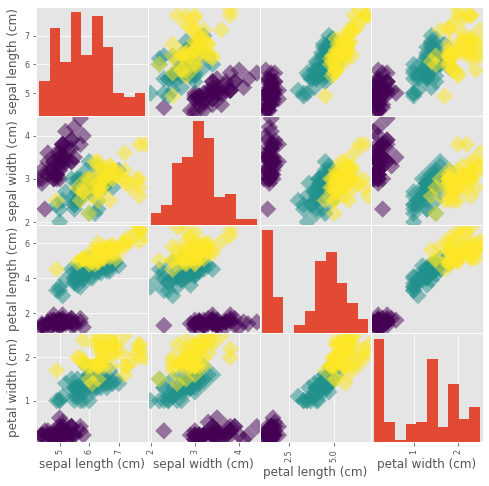

In [6]:
# visual EDA
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')
plt.show()

#### 1.3 The classification challenge

We need to construct a classifier and it needs to learn from the already labeled data -- training data!

We will choose a simple algorithm called **K-nearest neighbors**.
* Basic idea: predict the label of a data point by:
    * Looking at the 'k' closest labeled data points
    * Taking a majority vote
    
Scikit-learn fit and predict:
* All machine learning models are implemented as Python classes.
    * They implement the algorithms for learning and predicting
    * Store the information learned from the data
* Training a model on the data = 'fitting' a model to the data
    * .fit() method
* To predict the labels of new data: .predict() method


In [7]:
# construct classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [8]:
# predicting on unlabeled data
X_new = np.array([[5.6,2.8,3.9,1.1],
                  [5.7,2.6,3.8,1.3],
                  [4.7,3.2,1.3,0.2]])
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


#### 1.4 Measuring model performance

In classification, accuracy is a commonly used metric
* Accuracy = Fraction of correct predictions
It's a good practice to split data into training and test set. In this way, model performance could be better evaluated.
* Fit/ train the classifier on the training set
* Make the predictions on test set

Model complexity for KNN models:
* Larger k = smoother decision boundary = less complex model
* Smaller k = more complex model = can lead to overfitting


In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt

# load the digital digits dataset
digits = datasets.load_digits()

# print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# print the shape of images and data keys
print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

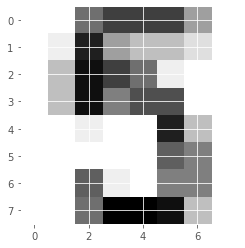

In [10]:
# dislay one example
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [12]:
# train/ test split + fit/ predict/ accuracy

# import modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# create feature 
X = digits.data
y = digits.target

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42, 
                                                    stratify=y)

# construct a KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# print the accuracy on test data
print(knn.score(X_test, y_test))

0.9833333333333333


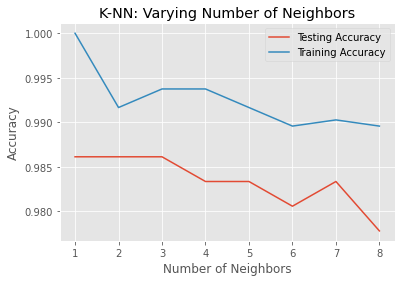

In [13]:
# overfitting and underfitting

# setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
# generate plot
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
    

### CHAPTER 2. Regression
#### 2.1 Introduction to regression
